## Método de Euler
Para obtener una solución aproximada de la ecuación diferencial:
$$\frac{dx}{dt}=f(x,t),$$
Donde para un intervalo de $[t_0,t_f]$ se subdivide en $n$ subintervalos con tamaño $h$, dando $n+1$ elementos. Con
    $$h=\frac{t_f-t_i}{n}$$
 Además tenemos una condición incial en $t_0$ dada como $$x_0=x(t_0)$$
utilizando el método de Euler, se implementa la siguiente fórmula de recurrencia:
$$x_{k+1}=x_k+hf(x_k,t_k)$$
donde $$x_k=x(t_k); \{0<k<n+1\}$$


__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [1]:
#Método de Euler
#n es el número de intervalos que tendrá la partición
function metodo_euler(f,x0,ti,tf,n)
    #El comando linespace genera subintervalos con n+1 elementos
    listt=linspace(ti,tf,n+1)
    #Con una distancia h, y para cada tk se cumple tk=t0+mh con m de 0 a n
    h=(tf-ti)/n
    listx=[]
    x=x0
    #Se pone la condición inicial para ti
    push!(listx,x)
    #La serie de recurrencia para nuestro intervalo
    for i in 2:(n+1)
        #x es el elemento inmediato inferior y y el superior
        y=x+h*f(x,listt[i])
        push!(listx,y)
        #Aquí se pasa al siguiente dato
        x=y
    end
    return listt, listx
end

#Función para encontrar n dada h
function intervalo(h,ti=0,tf=8)
    n=(tf-ti)/h
    return Int(n)
end

#Se crea la misma función pero evaluando en h
function metodo_eulerh(f,x0,ti,tf,h)
    n=intervalo(h)
    return metodo_euler(f,x0,ti,tf,n)
end

metodo_eulerh (generic function with 1 method)

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [2]:
#Condiciones iniciales
ti=0
tf=8
#Datos de funcion
α=2.5
f(x,t)=-α*x

f (generic function with 1 method)

Condición inicial 1: $x_0=1$

In [3]:
Dato1_1=metodo_eulerh(f,1,ti,tf,1)

(0.0:1.0:8.0, Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289])

In [4]:
Dato1_2=metodo_eulerh(f,1,ti,tf,.5)

(0.0:0.5:8.0, Any[1, -0.25, 0.0625, -0.015625, 0.00390625, -0.000976563, 0.000244141, -6.10352e-5, 1.52588e-5, -3.8147e-6, 9.53674e-7, -2.38419e-7, 5.96046e-8, -1.49012e-8, 3.72529e-9, -9.31323e-10, 2.32831e-10])

In [5]:
Dato1_3=metodo_eulerh(f,1,ti,tf,.2)

(0.0:0.2:8.0, Any[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.00195313  …  4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12, 9.09495e-13])

In [6]:
Dato1_4=metodo_eulerh(f,1,ti,tf,.01)

(0.0:0.01:8.0, Any[1, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9, 1.59843e-9])

Condición inicial 2: $x_0=2$

In [7]:
Dato2_1=metodo_eulerh(f,2,ti,tf,1)

(0.0:1.0:8.0, Any[2, -3.0, 4.5, -6.75, 10.125, -15.1875, 22.7813, -34.1719, 51.2578])

In [8]:
Dato2_2=metodo_eulerh(f,2,ti,tf,.5)

(0.0:0.5:8.0, Any[2, -0.5, 0.125, -0.03125, 0.0078125, -0.00195313, 0.000488281, -0.00012207, 3.05176e-5, -7.62939e-6, 1.90735e-6, -4.76837e-7, 1.19209e-7, -2.98023e-8, 7.45058e-9, -1.86265e-9, 4.65661e-10])

In [9]:
Dato2_3=metodo_eulerh(f,2,ti,tf,.2)

(0.0:0.2:8.0, Any[2, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625  …  9.31323e-10, 4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12])

In [10]:
Dato2_4=metodo_eulerh(f,2,ti,tf,.01)

(0.0:0.01:8.0, Any[2, 1.95, 1.90125, 1.85372, 1.80738, 1.76219, 1.71814, 1.67518, 1.6333, 1.59247  …  4.01496e-9, 3.91458e-9, 3.81672e-9, 3.7213e-9, 3.62827e-9, 3.53756e-9, 3.44912e-9, 3.3629e-9, 3.27882e-9, 3.19685e-9])

* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

Cuando solucionamos la ecuación diferencial nos queda como: $$x=x_0e^{\alpha t}$$

Ahora sólo debemos de graficar los resultados:

In [11]:
using PyPlot

In [12]:
#Para x_0=1
listt=linspace(0,8,1000)
listx1=[]
for i in 1:length(listt)
    x=1*exp(-α*listt[i])
    push!(listx1,x)
end
Dato1=listt,listx1

#Para x_0=2
listt=linspace(0,8,1000)
listx2=[]
for i in 1:length(listt)
    x=2*exp(-α*listt[i])
    push!(listx2,x)
end
Dato2=listt,listx2;

Resultados para condición 1

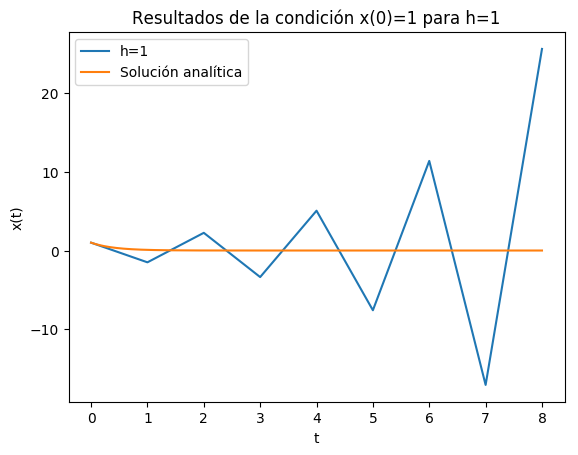

In [13]:
plot(Dato1_1[1],Dato1_1[2],label="h=1")
plot(Dato1[1],Dato1[2],label="Solución analítica")
legend()
title("Resultados de la condición x(0)=1 para h=1")
xlabel("t")
ylabel("x(t)")
show()

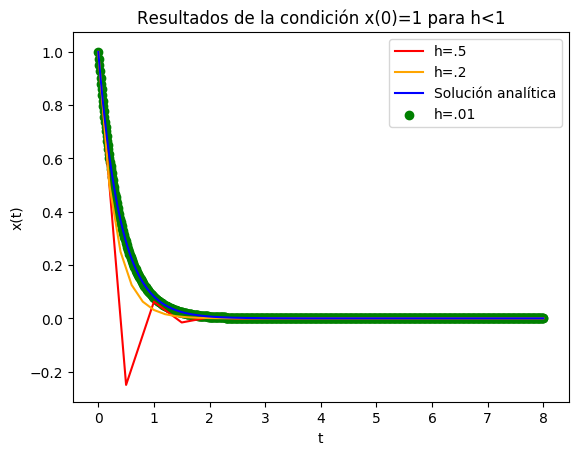

In [14]:
plot(Dato1_2[1],Dato1_2[2],label="h=.5",color="red")
plot(Dato1_3[1],Dato1_3[2],label="h=.2",color="orange")
scatter(Dato1_4[1],Dato1_4[2],label="h=.01",color="green")
plot(Dato1[1],Dato1[2],label="Solución analítica",color="blue")
legend()
title("Resultados de la condición x(0)=1 para h<1")

xlabel("t")
ylabel("x(t)")
show()

Resultados para condición 2

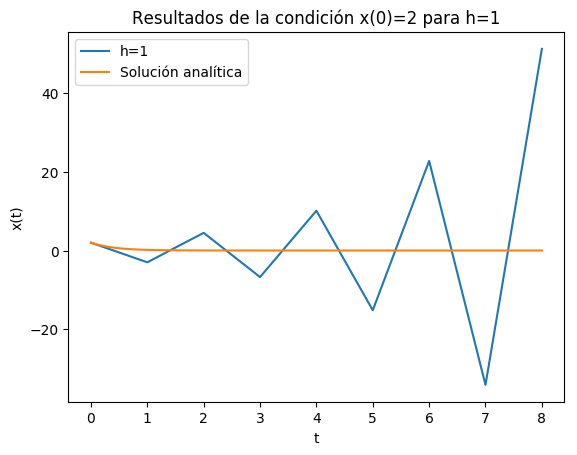

In [15]:
plot(Dato2_1[1],Dato2_1[2],label="h=1")
plot(Dato2[1],Dato2[2],label="Solución analítica")
legend()
title("Resultados de la condición x(0)=2 para h=1")
xlabel("t")
ylabel("x(t)")
show()

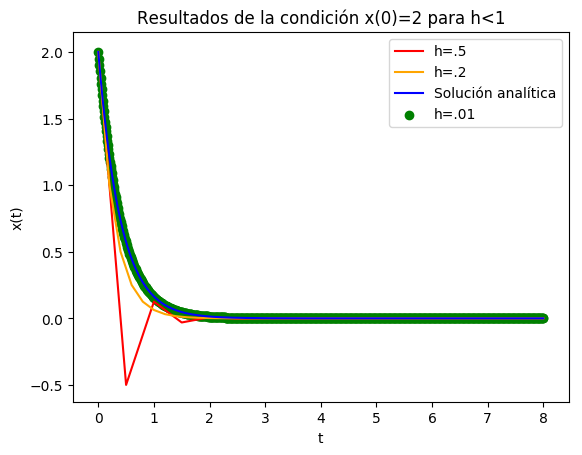

In [16]:
plot(Dato2_2[1],Dato2_2[2],label="h=.5",color="red")
plot(Dato2_3[1],Dato2_3[2],label="h=.2",color="orange")
scatter(Dato2_4[1],Dato2_4[2],label="h=.01",color="green")
plot(Dato2[1],Dato2[2],label="Solución analítica",color="blue")
legend()
title("Resultados de la condición x(0)=2 para h<1")
xlabel("t")
ylabel("x(t)")
show()

--------
__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

Si suponemos que k es positivo, esta ecuación modela un resorte ya que encontramos esta ecuación con la ley de hook y las leyes de Newton donde la masa que vale la unidad. Resolviendo nos queda una exponencial compleja que a su vez es un seno y un coseno. Evaluando la condición de $t=0$ y suponiendo que tenemos $x(0)$ y $x'(0)$ queda:
$$
x(t)=x(0)\cos(\sqrt{k}x)+\frac{x'(0)}{\sqrt{k}}sin(\sqrt{k}x)
$$

--------
__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

Tenemos que
$$ \dot{x} = u$$
Derivando
$$
\dot{u} = \ddot{x}=-kx,
$$
$$
\left.
\dot{x}=u \atop
\dot{u} = -kx 
\right\}
$$
Lo que justifica la expresión que se concluye.

-----------
__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

Tenemos que $\frac{d\overline{x}}{dt}=(u,-kx)$ y donde $\overline{x}=(x,u)=(x[1],x[2])$ si hacemos $k=1$, donde además pediremos que x(0)=1 y x'(0)=0 para comprobar la solución que obtuvimos en 2 es un coseno. así $\overline{x_0}=(1,0)$

In [1]:
F(x,t)=[x[2],-x[1]]
x0=[1,0]
ti=0
tf=4*pi;

In [18]:
w1=metodo_eulerh(F,x0,ti,tf,.5)
Datox1=[w1[1],map(x->x[1],w1[2])]

w2=metodo_eulerh(F,x0,ti,tf,.2)
Datox2=[w2[1],map(x->x[1],w2[2])]

w3=metodo_eulerh(F,x0,ti,tf,.01)
Datox3=[w3[1],map(x->x[1],w3[2])]

w4=metodo_eulerh(F,x0,ti,tf,.001)
Datox4=[w4[1],map(x->x[1],w4[2])]

listt=linspace(ti,tf,1000)
Dato=listt,cos.(listt);

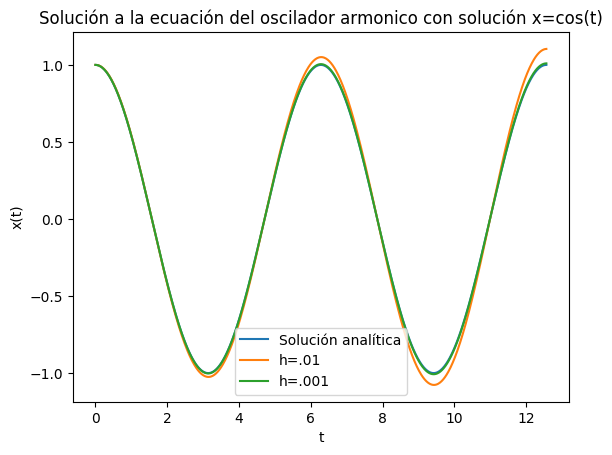

In [19]:
plot(Dato[1],Dato[2], label="Solución analítica")
plot(Datox3[1],Datox3[2], label="h=.01")
plot(Datox4[1],Datox4[2], label="h=.001")
legend()
xlabel("t")
ylabel("x(t)")
title("Solución a la ecuación del oscilador armonico con solución x=cos(t)")
show()

-------
__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

Nuestro código unicamente sirve para poner la condición inicial en el intervalo inicial de nuestra graficación. Es por eso que seleccionamos $t_i=0$ y debido a las propiedades de la gráfica de solución exacta pondremos a $t_f=1$

In [20]:
#Codigo para graficar la solución exacta
list_t=linspace(0,1,1000)
list_x=[]
for i in 1:length(listt)
    x=4+8*(list_t[i])-5(list_t[i])^2
    push!(list_x,x)
end
Dato=list_t,list_x;

In [21]:
g(x,t)=(2x-18t)/(1+t)
Dato5=metodo_eulerh(g,4,0,1,.01);

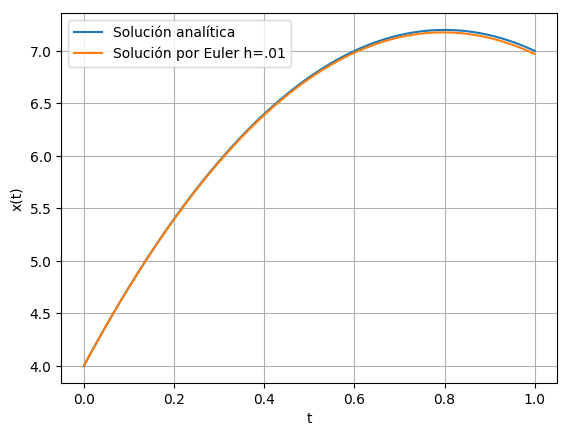

In [22]:
plot(Dato[1],Dato[2],label="Solución analítica")
plot(Dato5[1],Dato5[2],label="Solución por Euler h=.01")
grid("on")
legend()
xlabel("t")
ylabel("x(t)")
show()

*****
```python
F F M G
```